### Imports

In [1]:
# imports
from feature_processor import *
from mixed_frequency_bvar import *

### Feature processing

In [2]:
# path to data folder
path = '/home/romain/clean_codes/3_mf_bvar'
# name of file containing monthly features
feature_file = 'features.csv'
# name of file containing the information about monthly data
information_file = 'information.csv'

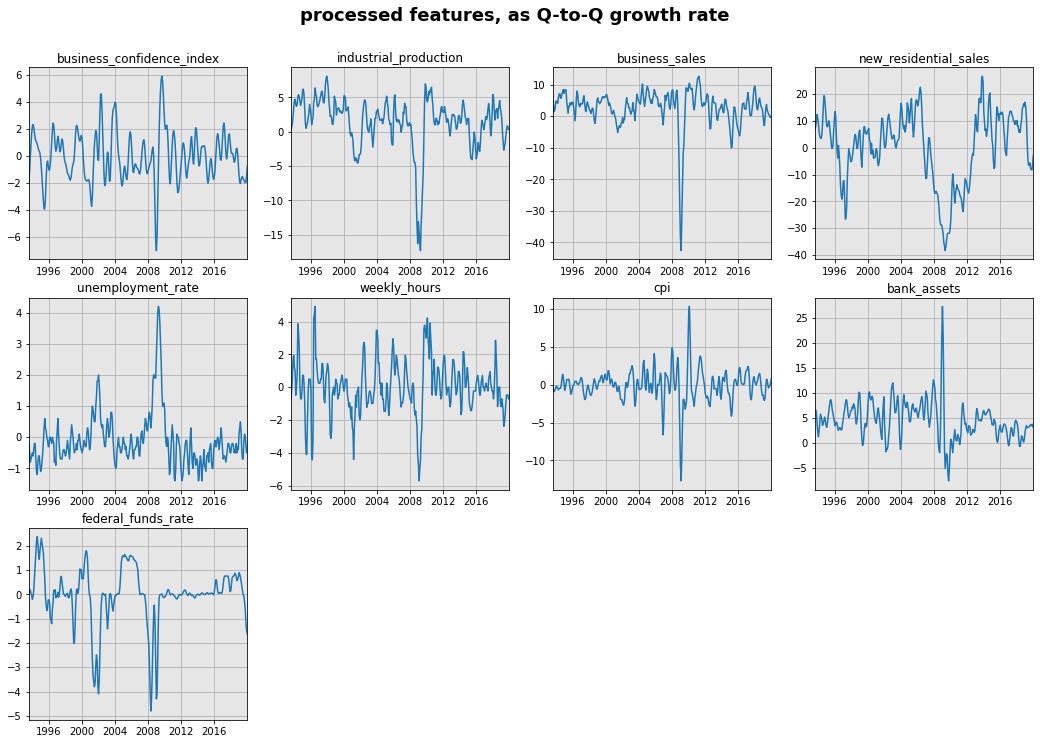

In [3]:
# declare feature processor
fp = FeatureProcessor(path, feature_file, information_file)
# load, process, and plot
fp.data_loader()
fp.data_processor()
fp.plot_processed_data()

In [4]:
# overview of processed features in dataframe
features = fp.processed_features
features.head(6)

,business_confidence_index,industrial_production,business_sales,new_residential_sales,unemployment_rate,weekly_hours,cpi,bank_assets,federal_funds_rate,quarterly_gdp
date,,,,,,,,,,
1993-07-31,-1.95175,0.156402,4.786526,6.969063,-0.2,-0.726083,-0.346079,6.370432,0.04,NaN
1993-08-31,-1.05541,0.662760,2.659460,7.938890,-0.5,-0.238872,-0.690407,6.631697,0.10,NaN
1993-09-30,-0.01763,1.174819,1.526916,10.375088,-0.8,0.489573,-0.896798,6.056690,0.18,0.477315
1993-10-31,0.92615,2.185627,2.437961,12.419164,-0.7,1.702287,-0.688508,3.850384,0.01,NaN
1993-11-30,1.71463,3.472390,4.687599,10.915173,-0.6,1.944119,-0.413161,2.232747,-0.03,NaN
1993-12-31,2.23292,4.516257,4.820045,8.713100,-0.5,1.212714,-0.140156,1.243932,-0.21,1.360113


### Mixed frequency Bayesian VAR

In [5]:
# lags
p = 2
# Minnesota hyperparameters: autoregressif coefficient
rho = 0.9
# Minnesota hyperparameters: overall tightness lambda_1
lambda_1 = 0.1
# Minnesota hyperparameters: cross-variable tightness lambda_2
lambda_2 = 0.5
# Minnesota hyperparameters: lag-specific tightness lambda_3
lambda_3 = 2
# Minnesota hyperparameters: exogenous variable tightness lambda_4
lambda_4 = 100
# number of retained iterations of the MCMC algorithm
r = 100
# number of burn-in iterations of the MCMC algorithm
d = 50

In [6]:
# declare mixed frequency BVAR
mfbvar = Mixed_Frequency_Bvar(feature_dataframe = features)
# get prior hyperparameters
mfbvar.prior(p, rho, lambda_1, lambda_2, lambda_3, lambda_4)
# mcmc algorithm
mfbvar.mcmc(r, d)

100 iterations of mcmc algorithm.


### plots of GDP estimates

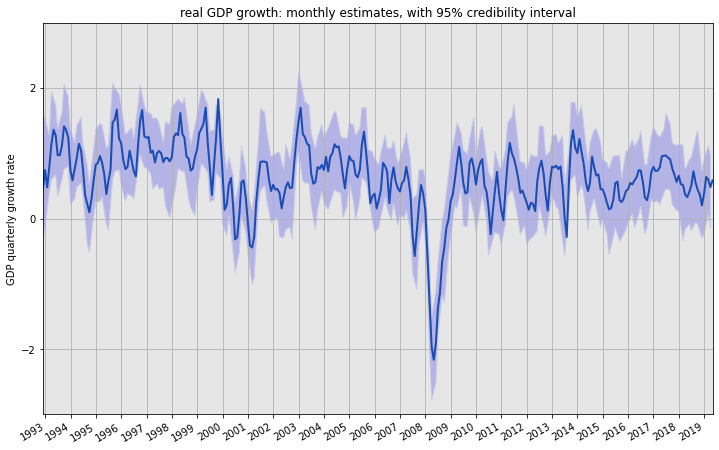

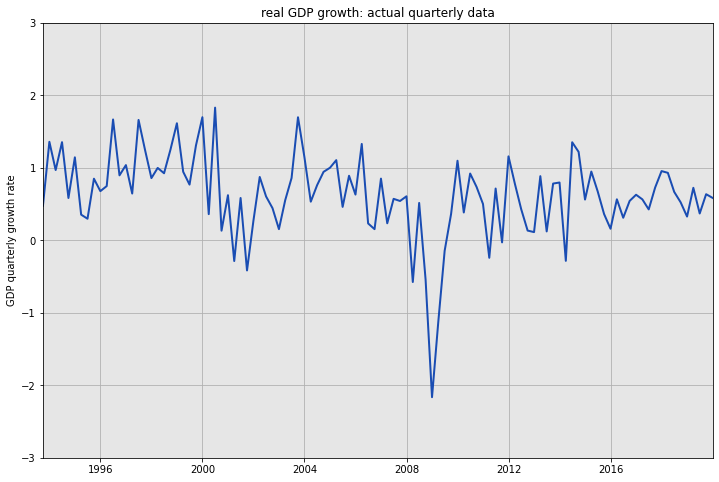

In [7]:
# plot inferred monthly GDP
mfbvar.plot_monthly_gdp()
# plot actual quarterly GDP
mfbvar.plot_quarterly_gdp()

### predictions

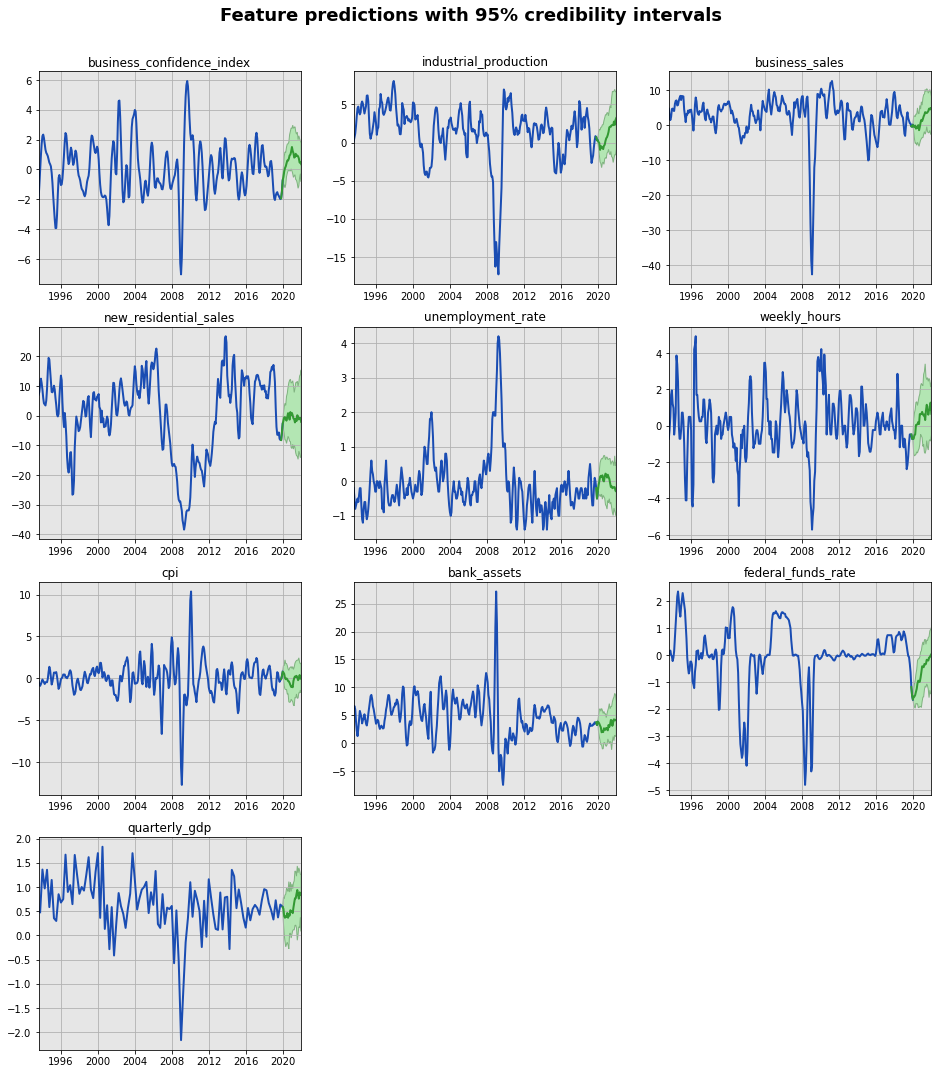

In [8]:
# number of periods ahead to forecast (in months)
h = 24
# generate predictions
mfbvar.forecast(h)
# plot predictions
mfbvar.plot_forecast()